In [1]:
# Install necessary libraries if you haven't already
# !pip install pandas matplotlib seaborn scipy

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import MDS
from scipy.spatial.distance import pdist, squareform

In [3]:
# Load the dataset
data_filepath = "C:\\Users\\nihar\\OneDrive\\Desktop\\Bootcamp\\SCMA 632\\DataSet\\icecream.csv"
icecream_data = pd.read_csv(data_filepath)

In [5]:

# Display the first few rows of the dataset
print(icecream_data.head())

# Check the structure of the dataset
print(icecream_data.info())

     Brand  Price  Availability  Taste  Flavour  Consistency  Shelflife
0     Amul      4             5      4        3            4          3
1  Nandini      3             2      3        2            3          3
2  Vadilal      2             2      4        3            4          4
3   Vijaya      3             1      3        5            3          4
4    Dodla      3             3      3        4            4          3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Brand         10 non-null     object
 1   Price         10 non-null     int64 
 2   Availability  10 non-null     int64 
 3   Taste         10 non-null     int64 
 4   Flavour       10 non-null     int64 
 5   Consistency   10 non-null     int64 
 6   Shelflife     10 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 692.0+ bytes
None


In [7]:
# Select only the numeric columns for MDS
icecream_data_numeric = icecream_data.drop(columns=['Brand'])

In [9]:
# Verify the cleaned data
print(icecream_data_numeric.info())
print(icecream_data_numeric.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Price         10 non-null     int64
 1   Availability  10 non-null     int64
 2   Taste         10 non-null     int64
 3   Flavour       10 non-null     int64
 4   Consistency   10 non-null     int64
 5   Shelflife     10 non-null     int64
dtypes: int64(6)
memory usage: 612.0 bytes
None
           Price  Availability      Taste    Flavour  Consistency  Shelflife
count  10.000000     10.000000  10.000000  10.000000    10.000000  10.000000
mean    3.000000      2.500000   3.500000   3.400000     3.500000   3.500000
std     0.816497      1.269296   0.849837   1.074968     0.527046   0.527046
min     2.000000      1.000000   2.000000   2.000000     3.000000   3.000000
25%     2.250000      2.000000   3.000000   3.000000     3.000000   3.000000
50%     3.000000      2.000000   3.500000   3.000000     3.50

In [11]:
# Compute the distance matrix
icecream_dist = pdist(icecream_data_numeric)

In [13]:
# Apply Multidimensional Scaling (MDS)
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=42)
mds_fit = mds.fit_transform(squareform(icecream_dist))

C:\Users\nihar\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


In [15]:
# Create a data frame with MDS results
mds_data = pd.DataFrame(mds_fit, columns=['Dim1', 'Dim2'])
mds_data['Sample'] = icecream_data['Brand']

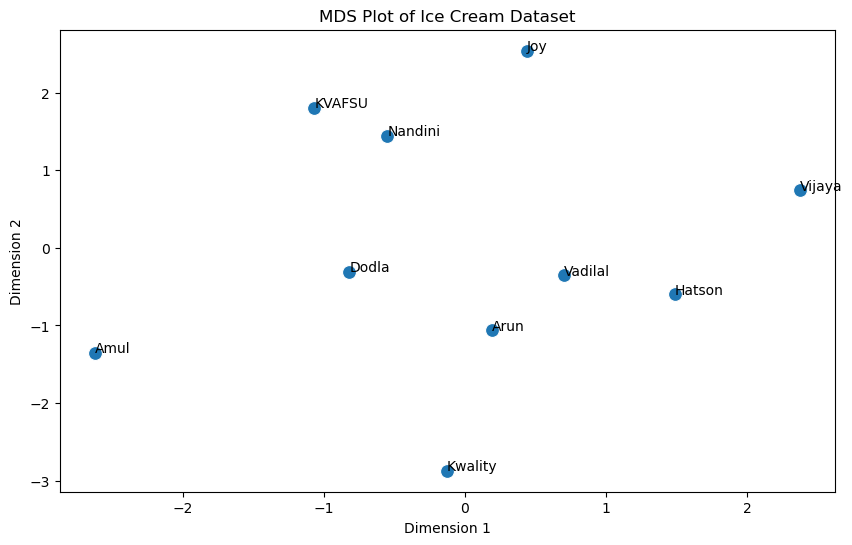

In [17]:
# Plot the MDS results
plt.figure(figsize=(10, 6))
sns.scatterplot(data=mds_data, x='Dim1', y='Dim2', s=100)
for i in range(mds_data.shape[0]):
    plt.text(mds_data['Dim1'][i], mds_data['Dim2'][i], mds_data['Sample'][i])
plt.title("MDS Plot of Ice Cream Dataset")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

In [19]:
# Create a heatmap of the distance matrix
heatmap_data = squareform(icecream_dist)
heatmap_data_df = pd.DataFrame(heatmap_data, index=icecream_data['Brand'], columns=icecream_data['Brand'])


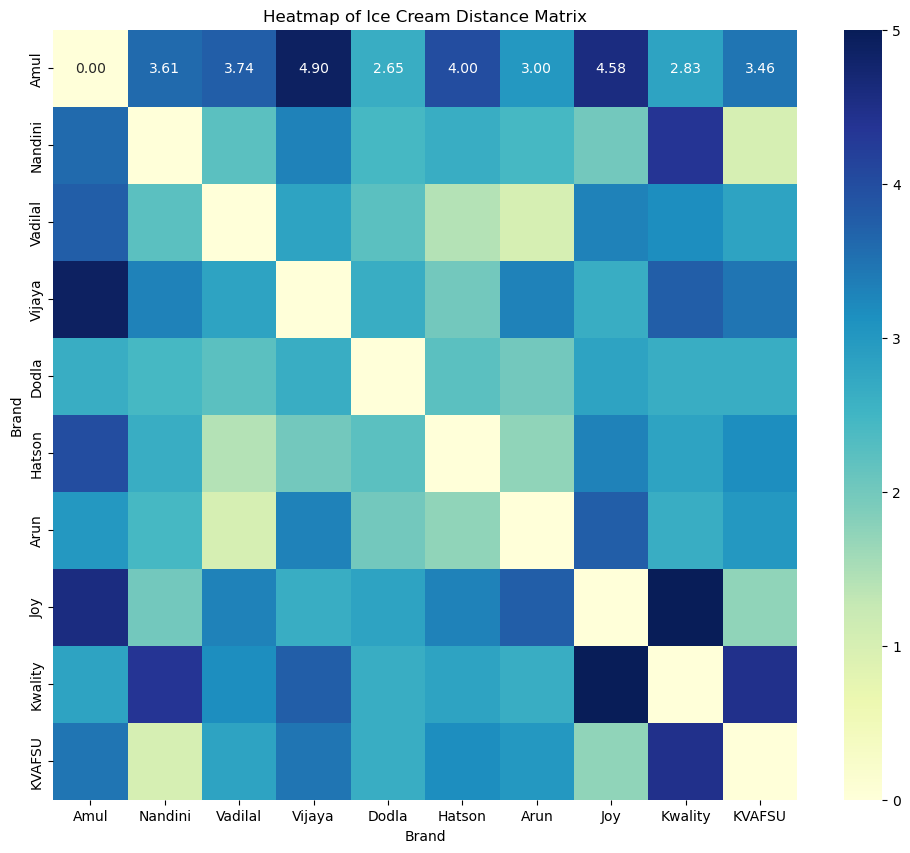

In [21]:
# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_data_df, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Heatmap of Ice Cream Distance Matrix")
plt.show()